# Gun Violence Analysis - Revised Version
- Rachel Lee
- Saira Gurung
- Kyle Wright

## Introduction
News reports involving gun violence have increased dramatically in recent years, causing safety concerns for U.S. children and teens, so prevention is paramount. Katie Gagnon wrote in a Philly Voice article that <i>every day, 78 kids or teens are killed or injured by gun violence. This is unacceptable but it can be changed (Gagnon, K., 2019)</i>.
  
From our background reading on the topic of gun violence in the U.S., we found that:

- Firearms are the second leading cause of death for children and teens (CDC, 2017).
- Compared to other high-income countries, American children aged 5 to 14 are 21 times more likely to be killed with guns, and American adolescents and young adults aged 15 to 24 are 23 times more likely to be killed with guns (Everytown for Gun Safety, 2019).
- When American children and teens are killed with guns, 58 percent are homicides, with 85% of those deaths occuring in the home, and nearly a third of those deaths are connected to intimate partner or family violence (Everytown for Gun Safety, 2019).
- There have been at least 405 incidents of gunfire on school grounds from 2013 to 2018. Of these, 260 occurred on the grounds of an elementary, middle, or high school, resulting in 109 deaths and 219 injuries (Everytown for Gun Safety, 2019).
- Hunting season takes place between July - Dec

Video

# Narrative

## Claim

- Gun owners are more careless in the warmer months resulting in higher gun violence amongst children and teens.

## Warrant and Backing

![](Images/seaonality-of-gun-violence-incidents.png)

From the chart, we can see that gun violence incidents occur more frequently in months July - November. [...]

## Rebuttal
Intentional gun violence leads to more deaths than accidental events

![](Visualizations/Rebuttal_Viz.png)

Although accidental deaths are prevalent in children and teens, it does not compare to the amount of intentional acts of gun violence that occur. Gun violence should be a topic that is brought up year around and in amongst all cisrcumstances, not just the high temperature months or holiday seasons.

# delete this later

## Qualifier

Place Sairas Viz Here

Explanation


## What to do next?
Advice to gun owners on keeping their homes safe when children and teens are present:
- keep them locked and unloaded
- educate your children on gun safety
- be SMART

Being SMART is a program of the Everytown for Gun Safety Support Fund that is designed to be a conversation about guns, kids and safety. SMART stands for safety practices that all parents should understand and employ:
  
**S**ecure all guns in homes and vehicles.  
**M**odel responsible behavior.  
**A**sk about unsecured guns in other homes.  
**R**ecognize the role of guns in suicide.  
**T**ell your peers to Be SMART.  
  
This campaign offers a lot of resources for gun safety, including how to talk to your kids about guns. 

# Making Of

Importing required python libraries for analysis.

In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import altair as alt
alt.renderers.enable('notebook')
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

Import cleaned dataset prepared in our data exploratory phase.

In [2]:
df = pd.read_csv('Data/gun_violence.csv')

Convert `Incident Date` to a datetime object for use in Altair visualizations.

In [3]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'], format="%B %d, %Y")

Drop `Unnamed` column, which does not provide any information of value to our analysis.

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

Filtered out Adults from the dataset to support our claim.

In [5]:
df = df[(df.Age == 'Child') | (df.Age == 'Teen')]

<hr style="height:0;border:1px solid #ececec" />

## Setting up color palette

We first begin by setting a color palette for the visualization so that all our referencing for the Categories will be consistent.

Using the ColorBrewer website (http://colorbrewer2.org/#type=diverging&scheme=Spectral&n=4), we determine a color palette that is photovopy safe.

In [6]:
palette = alt.Scale(domain=['Accidental', 'Intentional'], \
                  range=['#2b83ba', '#fdae61'])

<hr style="height:0;border:1px solid #ececec" />

## To support our claim, we have developed the following visualizations illustrating warrant, rebuttal, and qualifier.

 **Warrant**
 
 Gun violence incidents tend to rise when the weather is warmer or during the holiday seasons.

**Rebuttal**

Intentional gun violence leads to more deaths than accidental events

- Grouped 'Incident Date' and 'Category' to get the average of # Killed by date, age, and category

In [13]:
df1 = df.groupby(['Category', 'Incident Date', 'Age']).mean().reset_index()

In [9]:
source = df1

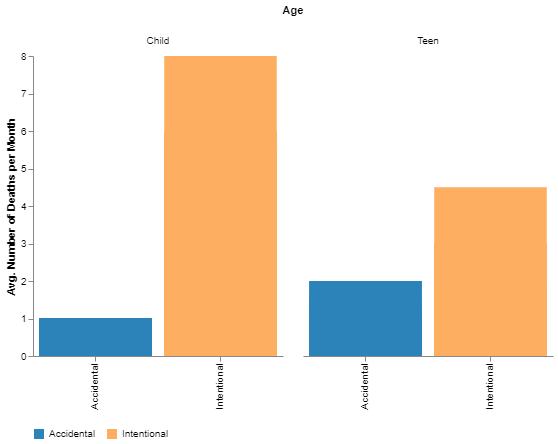

In [11]:
chart = alt.Chart(source).mark_bar().encode(
    
    x = alt.X('Category', title = None),
    y = alt.Y('# Killed', title = 'Avg. Number of Deaths per Month'),
    color = alt.Color('Category', scale= palette, title = None),
    column = 'Age',
    tooltip = ['Category','Incident Date','# Killed','# Injured']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 250
).configure_legend(
     orient = "bottom"
)

**What Changed**
1. Removed the difficult to interpret dot plot
2. Focused on the rebuttal argument 
3. Got straight to the point to make the rebuttal clearly stand out

**What was done to the data**
1. Filtered out Adults, Police Involvement, and Mass Shootings allowing for the drawbacks of our data to get filtered out.
2. Took the average per month to simplify the connection between the big picture rather than focusing on monthly changes.
3. Created a visualization that drives the rebuttal argument straight to the audience, signifying this is an issue and society needs to be educated on how to prevent these occurences regardless of what month it is.

## Qualifier
States with the highest number of gun crimes does not necessarily have the largest average number of deaths or injuries occurring from the incidents.

## 2. Is there seasonality to gun violence?

#### We look at the pattern for each incident category

We first begin by making a copy of the dataframe for analysis and renaming the column `Incident Date` to `Date`.

In [12]:
df_seasonality = df.copy()
df_seasonality.rename(columns={'Incident Date': 'Date'}, inplace=True)

In [13]:
df_seasonality.head()

,Date,State,City Or County,Address,# Killed,# Injured,Operations,Category,Age
0,2016-11-26,Maryland,Sabillasville,6600 block of Eylers Valley Flint Road,1,0,NaN,Accidental,Adult
1,2016-11-26,Ohio,Grand Rapids,SR Route 65,1,0,NaN,Accidental,Adult
2,2016-11-24,New York,Sandy Creek,Kehoe Road,1,0,NaN,Accidental,Adult
3,2016-11-24,Florida,Black Point,NaN,1,0,NaN,Accidental,Adult
4,2016-11-23,Michigan,Powell Township,North 1311 County Road KCI,1,0,NaN,Accidental,Adult


Assigning a Period to each incident (Quarter).

In [14]:
df_seasonality['Period'] = df_seasonality.Date.apply(lambda x: x.to_period("Q").to_timestamp())

In [15]:
df_seasonality.head()

,Date,State,City Or County,Address,# Killed,# Injured,Operations,Category,Age,Period
0,2016-11-26,Maryland,Sabillasville,6600 block of Eylers Valley Flint Road,1,0,NaN,Accidental,Adult,2016-10-01
1,2016-11-26,Ohio,Grand Rapids,SR Route 65,1,0,NaN,Accidental,Adult,2016-10-01
2,2016-11-24,New York,Sandy Creek,Kehoe Road,1,0,NaN,Accidental,Adult,2016-10-01
3,2016-11-24,Florida,Black Point,NaN,1,0,NaN,Accidental,Adult,2016-10-01
4,2016-11-23,Michigan,Powell Township,North 1311 County Road KCI,1,0,NaN,Accidental,Adult,2016-10-01


Checking the available unique categories of incidents.

In [16]:
df_seasonality.Category.unique()

array(['Accidental', 'Intentional', 'Mass Shootings',
       'Police Involvement'], dtype=object)

Create a new dataframe for plotting the chart on gun violence occurence by period.

In [17]:
seasonality = df_seasonality.groupby(['Period', 'Category'], as_index=False)['Date'].count().rename(columns={'Date':'Count'})

In [18]:
seasonality.head()

,Period,Category,Count
0,2014-01-01,Accidental,54
1,2014-01-01,Intentional,9
2,2014-01-01,Mass Shootings,50
3,2014-04-01,Accidental,52
4,2014-04-01,Intentional,40


### Overall seasonality of gun violence in the United States between 2014 - 2016

In the First Version, we looked at the overall trend of gun violence incidents through the years of 2014 - 2016. We also looked at the seasonality by months for each of the incident categories. 
  
For our revised version, we wanted to just focused on the Intentional and Accidental incidents and see the overall seasonality by months so that we can identify if there are specific months where gun violence incidents takes place more frequently.

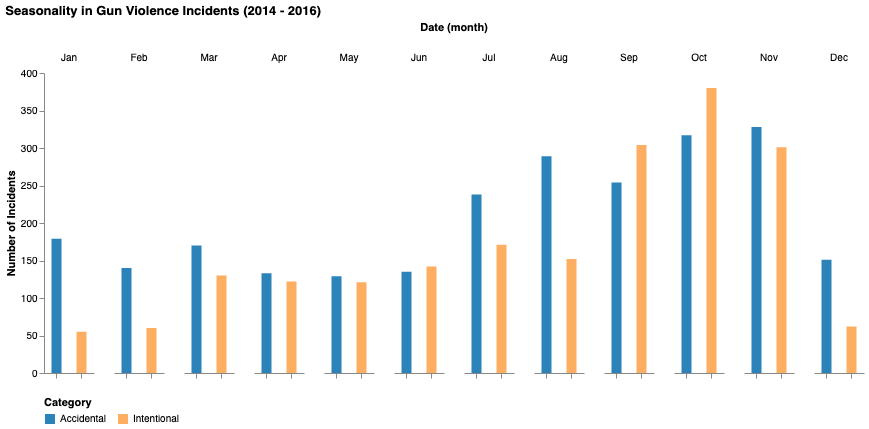

In [78]:
chart = alt.Chart(df_seasonality[(df_seasonality['Category'] == 'Accidental' )| (df_seasonality['Category'] == 'Intentional') ], title='Seasonality in Gun Violence Incidents (2014 - 2016)', name='seasonality') \
        .mark_bar(size=10) \
        .encode(
    column = alt.Column('Date', timeUnit='month'),
    x = alt.X('Category', axis=alt.Axis(labels=False, title=None)),
    y = alt.Y('count(Date)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=palette),
    tooltip = ['Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 50
).configure_legend(
     orient = "bottom"
)

### Observation

Looking at the charts, we can see that the second half of the year have higher incident counts compared to the first half of the year, peaking at October, followed by Novemnber and September. This is likely due to hunting season, where guns become more accessible to children and teens.
    

## 3. Relationship between gun crimes across states and the average number of injuries or deaths

The following visualizations was created using Tableau as part of a data exploratory workbook, which can be found here: https://public.tableau.com/profile/saira.gurung#!/vizhome/GunViolenceinUSA/Overalltrendandrelationshipofshootinginstancesandnumberofpeopleinjuredorkilledfrom2014to2016

![](Visualizations/2.png?raw=true)

#### Total gun violation occurence in the US categorized by different states in the order of most incidents to least.

![](Visualizations/6.png?raw=true)

#### Comparison of states within the US with highest average number of deaths or injuries due to gun violence crimes.

![](Visualizations/3.png?raw=true)

#### States with the highest number of deaths and injuries due to gun violence crimes.

### Narrative

Based on the above visualisations, the following can be deduced:
<ol>
<li>The states with the most average number of people injured from gun violence does not have the most average deaths from gun violence. </li>
<li>The states with largest number of gun crimes does not necessarily have the most severe consequence of people being injured or killed.</li>
<li>Some states may have lower number of gun crimes; however, those gun crimes have a more lethal effect. For instance, New Mexico is on the lower tail of the chart displaying total number of gun crimes, however, it has one of the most average number of deaths from gun violence thereby illustrating that gun violence in New Mexico tend to be more fatal.</li>
<li>States with warmer climate tend to have more instance of gun violence. </li>
</ol>

<hr/>

# Conclusion

Overall, gun violence in America is seeing an increasing trend, not only in incident occurrences, but also in victim counts, whether it be in numbers injured or killed. Additionally, months that have warmer temperatures or have major holiday/festive celebrations happenning are more likely to have gun violence incidents than months with lower temperatures. A quick search online on the corelation between temperatures and shooting incidents in the United States confirms this finding. One such report was an [article by The New York Times](https://www.nytimes.com/2018/09/21/upshot/a-rise-in-murder-lets-talk-about-the-weather.html).

# Future Work

More work can be explored in terms of seasonality and the effects of weather on gun violence using the dataset. We can also run our analysis by victim age groups to see if there is also a pattern there.

<hr/>

## Conclusion:
While some may argue that a change in legislature to tighten gun laws is the way to go, we believe that though it may make a change, its impact is not profound as people with an intention to procure a gun, especially with an intention to do harm, may not go through the system to purchase guns with a valid license. They find other means to obtain their guns, often illegally. Therefore, more effort needs to be put in place, such as programs like Be SMART, to creating gun violence prevention and safety amongst gun owners in hopes to reduce gun violence incidents involving children and teens, especially in unintentional incidents that could have been prevented with precaution measures.

# References

Dataset Source:  
**Kaggle** - https://www.kaggle.com/gunviolencearchive/gun-violence-database#officer_involved_shootings.csv  
**Gun Violence Archive** - https://www.gunviolencearchive.org/reports

Color Palette:  
**ColorBrewer 2.0** - http://colorbrewer2.org

Asher, J. (2018, Sept 21). <i>A Rise in Murder? Let’s Talk About the Weather. New York Times</i>. Retrieved from https://www.nytimes.com/2018/09/21/upshot/a-rise-in-murder-lets-talk-about-the-weather.html. Accessed on May 29, 2019.

Everytown for Gun Safety (2019, May 29). <i>The Impact of Gun Violence on Children and Teens</i>. Retrieved from https://everytownresearch.org/impact-gun-violence-american-children-teens/#foot_note_5. Accessed on June 1, 2019.

Gagnon, K. (2019, June 7). <i>Gun violence is a huge problem for U.S. children, so prevention is paramount</i>. Retrieved from https://www.phillyvoice.com/gun-safety-violence-children-america-prevention-paramount/. Accessed on June 7, 2019.  

Gifford Law Center (n.d.). <i>Shootings Spike in Summer Months</i>. Retrieved from https://lawcenter.giffords.org/resources/publications/shootings-spike-in-summer-months/. Accessed on May 29, 2019.

Tableau Link: https://public.tableau.com/profile/saira.gurung#!/vizhome/GunViolenceinUSA/Overalltrendandrelationshipofshootinginstancesandnumberofpeopleinjuredorkilledfrom2014to2016


[EOF]